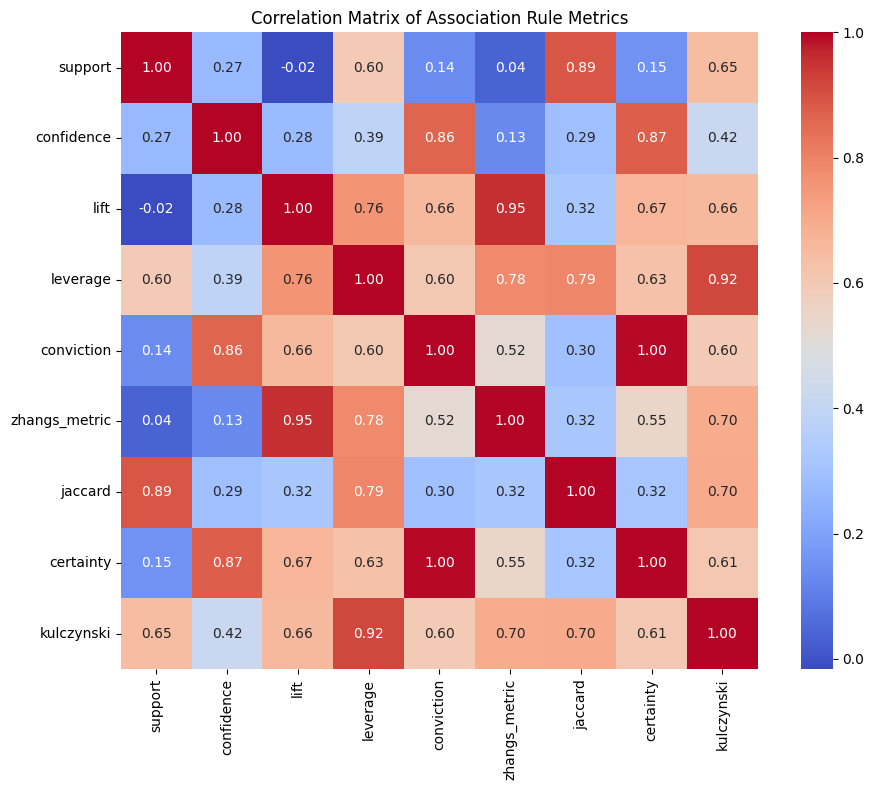

In [4]:
# Step 1: Install necessary libraries (if not already installed)
# pip install pandas matplotlib seaborn mlxtend

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Load the dataset
df = pd.read_csv("MBA copy.csv")
transactions = df.values.tolist()
transactions = [[item for item in transaction if pd.notnull(item)] for transaction in transactions]

# Step 3: One-hot encoding of transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Step 5: Generate rules with multiple metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Step 6: Normalize important metrics for comparison
metrics = ['support', 'confidence', 'lift', 'leverage', 'conviction',
           'zhangs_metric', 'jaccard', 'certainty', 'kulczynski']
normalized = rules[metrics].copy()
normalized = (normalized - normalized.min()) / (normalized.max() - normalized.min())

# Step 7: Save normalized metrics and correlation matrix
normalized.to_csv("normalized_rule_metrics.csv", index=False)
correlation_matrix = normalized.corr()
correlation_matrix.to_csv("metric_correlation_matrix.csv")

# Step 8: Visualize as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Association Rule Metrics")
plt.tight_layout()
plt.savefig("metric_comparison_heatmap.png")
plt.show()
